In [ ]:
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
import numpy as np
import matplotlib.pyplot as plt
# import cupy as cp

std_lst=['0.4','0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8']
wd_lst=['0.0', '0.01', '0.1', '1.0']

correct_matr_43=torch.load('/root/zhangzhongwang/pami_pic/weight.pt')
eig_dict={}

for wd in wd_lst:
    for std in std_lst:
        print(std)
        correct=0
        for seed in ['1', '2', '3']:
            print(seed)

            weight=correct_matr_43[f'std_{std}_wd_{wd}_seed_{seed}'].cpu().numpy()
            _, s, _ = np.linalg.svd(weight)
            eig_dict[f'std_{std}_wd_{wd}_seed_{seed}']=s
            
           


In [2]:

result_dict = {}

index_dict = {}

std_lst=['0.4','0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8']
wd_lst=['0.0', '0.01', '0.1', '1.0']
correct_matr_43=np.zeros((len(wd_lst),len(std_lst)))
index_all_dict={}
for wd in wd_lst:
    for std in std_lst:
        correct=0
        index_all=0
        for seed in ['1', '2', '3']:
            flag=0
            eigvals=eig_dict[f'std_{std}_wd_{wd}_seed_{seed}']
            pro=eigvals/np.max(eigvals)
            index_all+=np.sum(pro**2)

        index_all_dict[f'std_{std}_wd_{wd}']=index_all/3
        correct_matr_43[wd_lst.index(wd),std_lst.index(std)]=index_all/3
        

(0.01, 1.0)

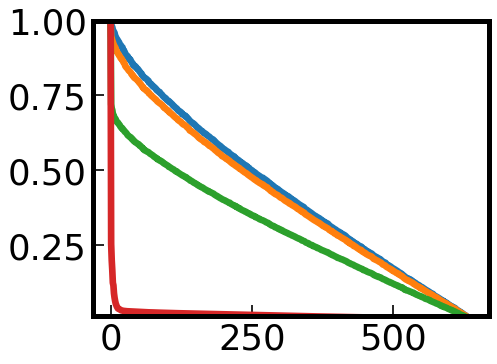

In [145]:
plt.plot(eig_dict[f'std_0.4_wd_0.0_seed_1']/np.max(eig_dict[f'std_0.4_wd_0.0_seed_1']))
plt.plot(eig_dict[f'std_0.45_wd_0.0_seed_1']/np.max(eig_dict[f'std_0.45_wd_0.0_seed_1']))
plt.plot(eig_dict[f'std_0.5_wd_0.0_seed_1']/np.max(eig_dict[f'std_0.5_wd_0.0_seed_1']))
plt.plot(eig_dict[f'std_0.7_wd_0.0_seed_1']/np.max(eig_dict[f'std_0.7_wd_0.0_seed_1']))

plt.ylim(1e-2,1)

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    plt.rcParams['lines.linewidth'] = lw
    

    plt.rcParams['lines.markersize'] = ms

    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)


    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs

    plt.rcParams['axes.linewidth'] = axlw

    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw

    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len

    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0

    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len

    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False

    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['legend.frameon'] = False

    plt.rcParams['figure.dpi'] = dpi

    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):

    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):

    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


In [4]:
color_matrix = correct_matr_43.T   

/tmp/ipykernel_2830055/2625703320.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdBu_r")


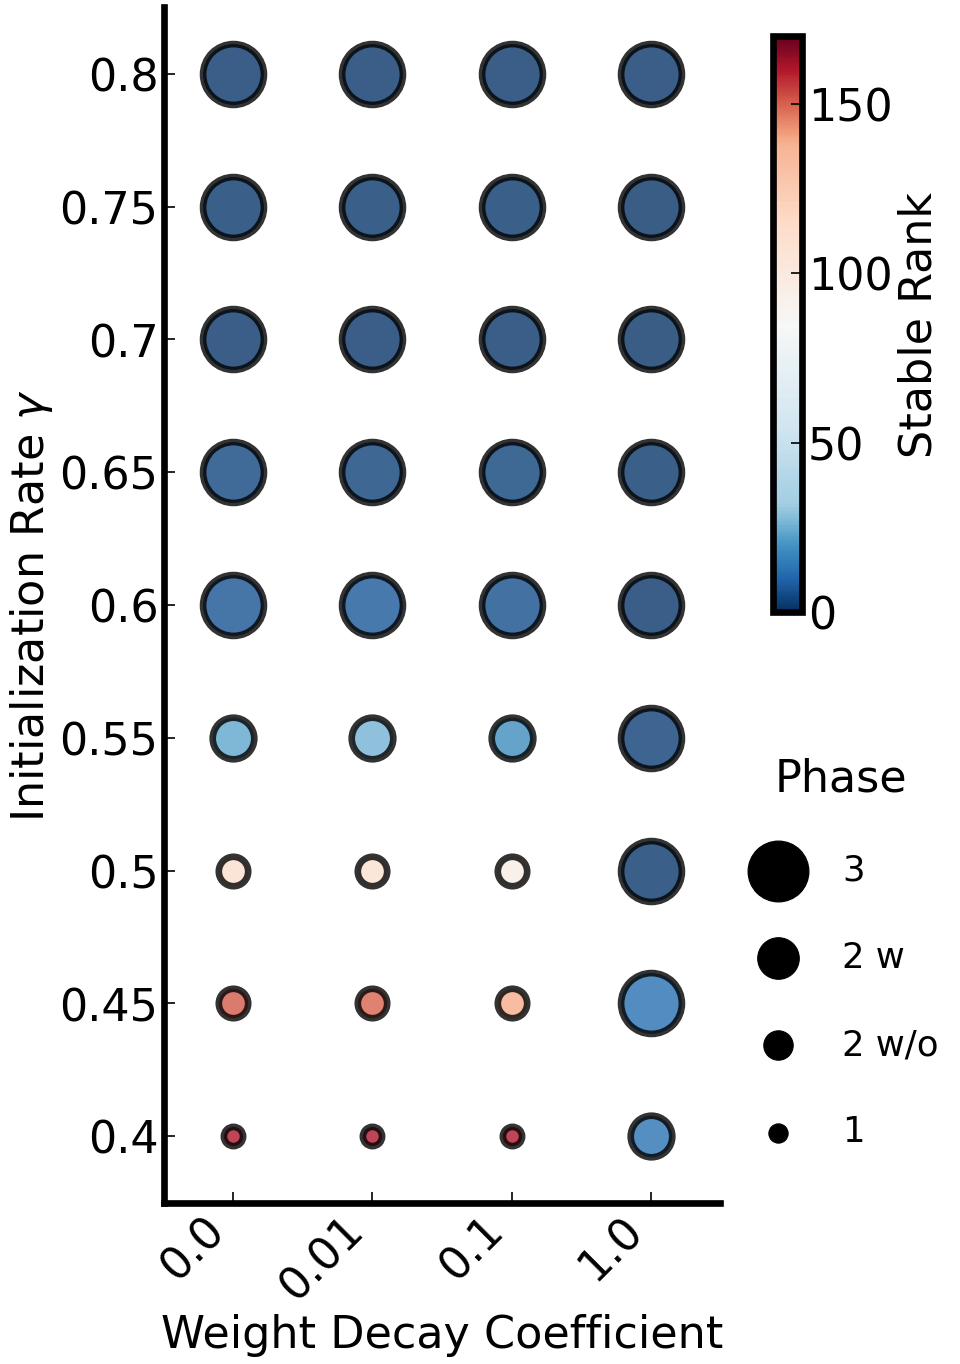

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Example matrices for sizes and colors (9 genes × 4 cell types)
size_matrix = np.ones((9, 4)) * 4  # Circle sizes (0-100%)
size_matrix[:4, :3] = 3
size_matrix[0, 3] = 3
size_matrix[:3, :3] = 2
size_matrix[0, :3] = 1

# Example color matrix

genes = ['0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8']
cell_types = ['0.0', '0.01', '0.1', '1.0']

size_bins = [0, 1.5, 2.5, 3.5, 4.5]
circle_sizes = [300, 700, 1400, 3000]  # Four distinct circle sizes
size_matrix_binned = np.digitize(size_matrix, bins=size_bins) - 1

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 18))
format_settings(wspace=0.4, hspace=0.6, bottom=0.12,left=0.18,right=0.79, fs=40, lw=6, ms=12.5, axlw=6, major_tick_len=10)

# Normalize the color matrix for the colormap
norm = mcolors.Normalize(vmin=0, vmax=170)
cmap = cm.get_cmap("RdBu_r")

middle_value1=0.33
middle_value2=0.67

cmap = cm.RdBu_r
# cmap1 = mcolors.ListedColormap(cmap(np.linspace(0.0, middle_value1, 256)))
# cmap2 = mcolors.ListedColormap(cmap(np.linspace(middle_value1, middle_value2, 256)))
# cmap3 = mcolors.ListedColormap(cmap(np.linspace(middle_value2, 1.0, 256)))

colors1 = cmap(np.linspace(0.0, middle_value1, 80))
colors2 = cmap(np.linspace(middle_value1, middle_value2, 256))
colors3 = cmap(np.linspace(middle_value2, 1.0, 80))
combined_colors = np.vstack((colors1, colors2, colors3))

combined_cmap = mcolors.ListedColormap(combined_colors)

# Create the dot plot
for i in range(len(genes)):
    for j in range(len(cell_types)):
        # Circle size is determined by the binned size_matrix
        circle_size = circle_sizes[size_matrix_binned[i, j]]
        # Circle color is determined by the color matrix
        color = combined_cmap(norm(color_matrix[i, j]))
        ax.scatter(
            j, i, s=circle_size, c=[color], alpha=0.8, edgecolor="black", linewidth=6
        )

# Customize the axes
ax.set_xticks(range(len(cell_types)))
ax.set_xticklabels(cell_types, rotation=45, ha="right")
ax.set_yticks(range(len(genes)))
ax.set_yticklabels(genes)
ax.set_xlim(-0.5, len(cell_types) - 0.5)
ax.set_ylim(-0.5, len(genes) - 0.5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# Add a colorbar
cbar = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap=combined_cmap),
    ax=ax, orientation="vertical", fraction=0.02, pad=0.03
)

cbar.ax.set_position([0.815, 0.53, 0.6, 0.4])  # [left, bottom, width, height]
# cbar.ax.set_aspect(10)
cbar.set_label("Stable Rank")

# Add labels
ax.set_xlabel("Weight Decay Coefficient")
ax.set_ylabel(r"Initialization Rate $\gamma$")

# Add a legend for circle sizes
legend_sizes = circle_sizes[::-1]
phase = ['1', '2 w/o', '2 w', '3'][::-1]

for ind, size in enumerate(legend_sizes):
    ax.scatter([], [], s=size, c="black", alpha=1.0, edgecolor="black", label=phase[ind])

legend = ax.legend(
    title="Phase",
    loc="upper right",
    bbox_to_anchor=(1.45, 0.4),
    frameon=False,
    labelspacing=1.5,
    fontsize=32,
    
)

# plt.tight_layout()
plt.savefig('weight_decay.png')

